# ARC-X: Scale Amplification for the bLUNA-LUNA Pool

### Remark. The specific values of A parameter depend on the representation of the function implemented in the pool. In Astroport the amplification parameter is given as a=A*n^(n-1), where n=2 is the number of tokens. For that reason in the functions below the a=2A is used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import fsolve
from matplotlib.pyplot import figure

C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv('F:/Scripts/DeFi/Amplification/bLuna_luna.csv', index_col=0)

In [3]:
data

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1
242366,terra,columbus-5,5846709,2021-12-28 00:00:07.510,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,NaN,1.020810,0.979614
259181,terra,columbus-5,5846711,2021-12-28 00:00:20.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.940,1.020810,0.979614
266761,terra,columbus-5,5846713,2021-12-28 00:00:33.357,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.907,1.020810,0.979614
258451,terra,columbus-5,5846716,2021-12-28 00:00:52.978,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667203.029542,uluna,653603.040061,1.640650e+09,19.621,1.020808,0.979616
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235061,terra,columbus-5,6208698,2022-01-24 23:57:43.106,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,91.176,1.023901,0.976657
228297,terra,columbus-5,6208699,2022-01-24 23:57:49.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,6.344,1.023901,0.976657
228483,terra,columbus-5,6208706,2022-01-24 23:58:33.629,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,44.179,1.023901,0.976657
240632,terra,columbus-5,6208710,2022-01-24 23:58:59.204,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,25.575,1.023901,0.976657


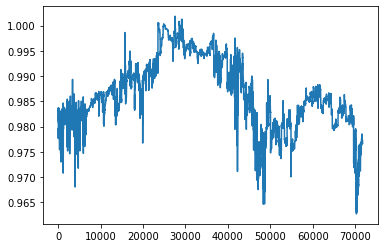

In [4]:
plt.plot(data.price1.values)

In [5]:
data['token0_swap'] = (data.TOKEN_0_AMOUNT - data.TOKEN_0_AMOUNT.shift(1))
data['token1_swap'] = (data.TOKEN_1_AMOUNT - data.TOKEN_1_AMOUNT.shift(1))

In [6]:
data_clean = data[data.token0_swap * data.token1_swap<0]

In [7]:
data_clean

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1,token0_swap,token1_swap
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934,233.000000,-227.486431
271523,terra,columbus-5,5846721,2021-12-28 00:01:26.295,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667330.833028,uluna,653478.860232,1.640650e+09,27.184,1.021197,0.979243,-105.196514,103.306602
247888,terra,columbus-5,5846725,2021-12-28 00:01:52.146,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667328.813342,uluna,653480.843952,1.640650e+09,19.244,1.021191,0.979249,-2.019686,1.983720
267324,terra,columbus-5,5846739,2021-12-28 00:03:26.952,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667264.423861,uluna,653544.199465,1.640650e+09,62.405,1.020994,0.979438,-64.389481,63.355513
254618,terra,columbus-5,5846745,2021-12-28 00:04:14.359,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667564.423861,uluna,653251.381180,1.640650e+09,6.343,1.021910,0.978559,300.000000,-292.818285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234186,terra,columbus-5,6208570,2022-01-24 23:43:50.979,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737203.519097,uluna,720442.738721,1.643068e+09,50.776,1.023265,0.977264,14.570541,-14.196833
233236,terra,columbus-5,6208580,2022-01-24 23:44:55.107,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737193.406717,uluna,720452.651063,1.643068e+09,38.005,1.023236,0.977291,-10.112380,9.912342
228267,terra,columbus-5,6208588,2022-01-24 23:45:45.693,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737191.819412,uluna,720454.206994,1.643068e+09,44.283,1.023232,0.977295,-1.587305,1.555931
231742,terra,columbus-5,6208604,2022-01-24 23:47:29.122,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737194.612195,uluna,720451.485818,1.643068e+09,31.396,1.023240,0.977288,2.792783,-2.721176


In [8]:
data_clean['balance'] = 1 - abs(data_clean.TOKEN_1_AMOUNT/(data_clean.TOKEN_0_AMOUNT+data_clean.TOKEN_1_AMOUNT) - 0.5) - abs(data_clean.TOKEN_0_AMOUNT/(data_clean.TOKEN_0_AMOUNT+data_clean.TOKEN_1_AMOUNT) - 0.5)

C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


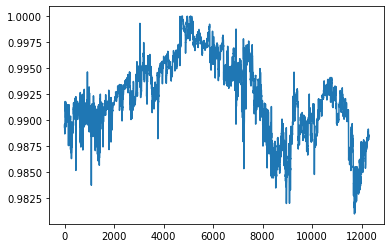

In [9]:
plt.plot(data_clean.balance.values)

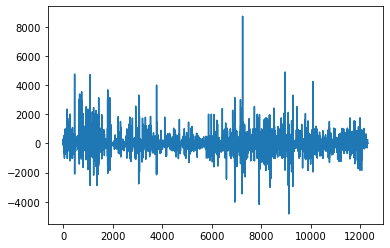

In [10]:
plt.plot(data_clean.token0_swap.values)

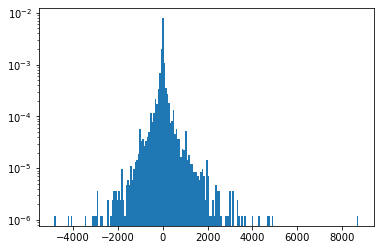

In [11]:
plt.hist(data_clean.token0_swap.values, density=True, bins=200, log = True);

# Dependence of the fair price location on the A

In [28]:
# This function returns the difference between the derivative and a given price s
def calculate_derivative(x, A, D, s):
    
    A = A*2
    d = -0.5*(-1+0.5/np.sqrt((D**3/(A*x)+((1-1/A)*D-x)**2)) * (-D**3/(A*x**2)-2*((1-1/A)*D-x))) - s
    
    return d

In [29]:
# This finction returns the amount of y token under a given amount of x token
def y_calc(A, D, x):

    A = A*2
    b = (1 - 1 / A) * D - x
    dsc = 4*D * (D/2)**2 / (A*x) + b**2
    y = (np.sqrt(dsc) + b) / 2
    
    return y

In [30]:
#Check: for perfectly balanced pool the fsolve should return D/2
A = 1
D = 650000*2
s = 1 
x_initial_guess = 600000
x_solution = fsolve(calculate_derivative, x_initial_guess, args = (A, D, s))
x_solution[0] 

649999.9999999999

In [40]:
D = 1300000 # approximate current pool size
x = []
dx_all = []
price = 0.98 # target fair market price for bLUNA-LUNA
x_amount = D/2

x = []
y = []

A_list = [1, 5, 10, 15, 25, 50]

for A in A_list:
    
    x_solution = fsolve(calculate_derivative, x_initial_guess, args = (A, D, price))[0]
    dx = x_solution - x_amount
    y_solution = y_calc(A, D, x_solution)

    x_amount = x_solution
    
    x.append(x_solution)
    y.append(y_solution)
    
    dx_all.append(dx)

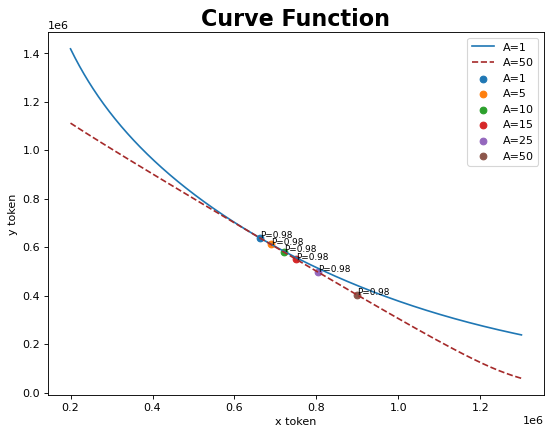

In [41]:
figure(figsize=(8, 6), dpi=80)

A1 = 1
x1 = np.linspace(200000, 1300000, 500)
y1 = y_calc(A1, D, x1)

A2 = 50
x2 = x1
y2 = y_calc(A2, D, x2)

plt.plot(x1, y1, label = f"A={A1}")
plt.plot(x2, y2, '--', color='brown', label = f"A={A2}")

for xs, ys, A in zip(x,y,A_list):

    labelA = f"A={A}"
    plt.scatter(xs,ys, label = labelA);
    plt.text(xs,ys, "P=0.98", fontsize=8)

plt.title('Curve Function', fontsize=20, fontweight="bold")
plt.xlabel("x token")
plt.ylabel("y token")
plt.legend();

# Dependence of the pool balance on A

In [52]:
# Loop over all prices
D = data_clean.TOKEN_0_AMOUNT.values[0] + data_clean.TOKEN_1_AMOUNT.values[0] 

df_x = pd.DataFrame()
df_y = pd.DataFrame()
df_dx = pd.DataFrame()

df_balance = pd.DataFrame()
x_initial_guess = D/2

A_range = [1] + list(np.arange(5,200,5))

for A in A_range:
    
    x = []
    y = []
    balance = []
    dx_all = []
    x_amount = data_clean.TOKEN_1_AMOUNT.values[0]
    
    for price in data_clean.price1.values:

        x_solution = fsolve(calculate_derivative, x_initial_guess, args = (A, D, price))[0]
        y_solution = y_calc(A, D, x_solution)
                
        bal = 1 - abs(x_solution / (x_solution + y_solution) - 1/2) - abs(y_solution / (x_solution + y_solution) - 1/2)
        
        dx = x_solution - x_amount
        x_amount = x_solution

        x.append(x_solution)
        y.append(y_solution)
        balance.append(bal)
        dx_all.append(dx)
    
    df_x[A] = x
    df_y[A] = y
    df_balance[A] = balance
    df_dx[A] = dx_all

In [53]:
df_dx[1:]

,1,5,10,15,20,25,30,35,40,45,...,150,155,160,165,170,175,180,185,190,195
1,-210.580483,-621.806962,-1087.466672,-1472.220372,-1767.741121,-1981.522717,-2128.191902,-2223.288177,-2280.303147,-2309.868743,...,-1820.442934,-1798.062189,-1776.364819,-1755.327879,-1734.927838,-1715.141020,-1695.943921,-1677.313439,-1659.227040,-1641.662866
2,-4.043011,-11.941131,-20.897680,-28.317943,-34.037327,-38.191963,-41.056296,-42.925023,-44.055801,-44.652764,...,-35.314188,-34.881471,-34.461872,-34.054960,-33.660294,-33.277425,-32.905908,-32.545304,-32.195184,-31.855131
3,-129.004304,-381.072977,-667.176660,-904.598604,-1087.996553,-1221.562264,-1313.925737,-1374.416198,-1411.226022,-1430.867781,...,-1134.114553,-1120.247239,-1106.798354,-1093.754424,-1081.101505,-1068.825467,-1056.912210,-1045.347820,-1034.118677,-1023.211531
4,598.728776,1767.697332,3090.295225,4181.429040,5017.852133,5621.535959,6034.595648,6301.502419,6460.714499,6542.448191,...,5146.733489,5083.349625,5021.908383,4962.343694,4904.587996,4848.573447,4794.232807,4741.500074,4690.310931,4640.603046
5,-203.914186,-601.774716,-1050.713393,-1419.241248,-1699.894786,-1900.881885,-2037.133124,-2124.123734,-2175.070613,-2200.257910,...,-1719.882317,-1698.573043,-1677.925348,-1657.915755,-1638.520473,-1619.715772,-1601.478260,-1583.785071,-1566.613999,-1549.943591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,26.346779,77.576795,134.594210,180.231065,213.860826,237.021566,251.997937,260.968508,265.690097,267.469852,...,203.228319,200.643971,198.144249,195.725649,193.384723,191.118117,188.922583,186.794997,184.732367,182.731831
12296,-18.340446,-54.002023,-93.689941,-125.452852,-148.855682,-164.970506,-175.388684,-181.627202,-184.909099,-186.144209,...,-141.420227,-139.621684,-137.882047,-136.198875,-134.569769,-132.992390,-131.464479,-129.983862,-128.548453,-127.156261
12297,-2.878839,-8.476735,-14.707618,-19.695704,-23.372258,-25.904979,-27.543252,-28.525008,-29.042187,-29.237642,...,-22.219271,-21.936766,-21.663509,-21.399116,-21.143213,-20.895432,-20.655418,-20.422831,-20.197344,-19.978643
12298,5.049976,14.869602,25.799418,34.548948,40.997697,45.439942,48.313220,50.034936,50.941792,51.284368,...,38.972622,38.477095,37.997789,37.534034,37.085169,36.650552,36.229560,35.821595,35.426083,35.042476


In [54]:
df_balance

,1,5,10,15,20,25,30,35,40,45,...,150,155,160,165,170,175,180,185,190,195
0,0.978715,0.936503,0.885487,0.837602,0.793585,0.753666,0.717727,0.685462,0.656487,0.630409,...,0.380140,0.374393,0.368895,0.363630,0.358582,0.353736,0.349080,0.344601,0.340289,0.336133
1,0.979031,0.937434,0.887114,0.839802,0.796225,0.756623,0.720902,0.688778,0.659886,0.633850,...,0.382844,0.377064,0.371534,0.366237,0.361159,0.356284,0.351599,0.347092,0.342753,0.338571
2,0.979037,0.937452,0.887145,0.839845,0.796276,0.756680,0.720964,0.688842,0.659951,0.633917,...,0.382897,0.377115,0.371585,0.366288,0.361209,0.356333,0.351648,0.347140,0.342801,0.338619
3,0.979230,0.938022,0.888143,0.841197,0.797901,0.758504,0.722924,0.690892,0.662055,0.636050,...,0.384582,0.378780,0.373229,0.367913,0.362815,0.357921,0.353218,0.348693,0.344337,0.340138
4,0.978333,0.935376,0.883521,0.834948,0.790407,0.750114,0.713922,0.681496,0.652426,0.626302,...,0.376937,0.371229,0.365771,0.360543,0.355531,0.350720,0.346098,0.341652,0.337372,0.333248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,0.977011,0.931480,0.876749,0.825852,0.779577,0.738071,0.701081,0.668164,0.638825,0.612586,...,0.366419,0.360844,0.355514,0.350411,0.345520,0.340826,0.336317,0.331981,0.327807,0.323786
12296,0.977038,0.931561,0.876889,0.826039,0.779799,0.738317,0.701342,0.668435,0.639100,0.612863,...,0.366629,0.361051,0.355719,0.350613,0.345719,0.341023,0.336511,0.332173,0.327997,0.323974
12297,0.977042,0.931574,0.876911,0.826068,0.779833,0.738355,0.701383,0.668477,0.639143,0.612906,...,0.366662,0.361084,0.355751,0.350645,0.345750,0.341054,0.336542,0.332203,0.328027,0.324004
12298,0.977035,0.931551,0.876872,0.826017,0.779772,0.738288,0.701311,0.668402,0.639067,0.612830,...,0.366604,0.361027,0.355694,0.350589,0.345695,0.341000,0.336488,0.332150,0.327975,0.323952


In [36]:
#Optimal A
A_opt = 30

x_opt = []
y_opt = []
balance_opt = []
dx_all_opt = []
x_amount_opt = data_clean.TOKEN_1_AMOUNT.values[0]

for price in data_clean.price1.values:

    x_solution = fsolve(calculate_derivative, x_initial_guess, args = (A_opt, D, price))[0]
    
    y_solution = y_calc(A_opt, D, x_solution)
        
    bal = 1 - abs(x_solution / (x_solution + y_solution) - 1/2) - abs(y_solution / (x_solution + y_solution) - 1/2)
        
    dx = x_solution - x_amount_opt
    x_amount_opt = x_solution

    x_opt.append(x_solution)
    y_opt.append(y_solution)
    balance_opt.append(bal)
    dx_all_opt.append(dx)

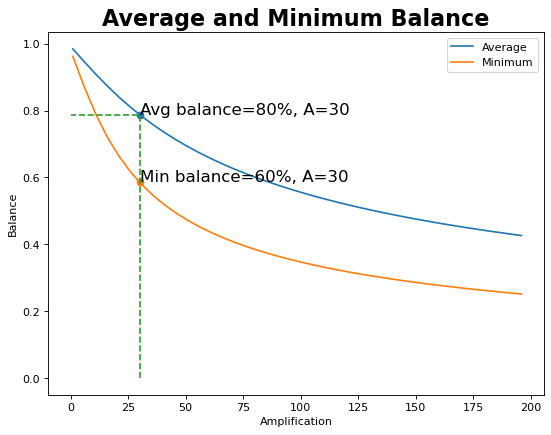

In [37]:
figure(figsize=(8, 6), dpi=80)

A_orig = A_opt # due to the representation used in Astro

plt.plot(df_balance.columns.values, df_balance.mean(), label = 'Average');
plt.plot(df_balance.columns.values, df_balance.min(), label = 'Minimum');

xx = [A_orig,  A_orig, 0]
yy = [0, np.mean(balance_opt), np.mean(balance_opt)]
plt.plot(xx,yy,'--')

bal_avg = int(np.round(np.mean(balance_opt), 1)*100)
bal_min = int(np.round(np.min(balance_opt), 1)*100)

plt.text(A_orig,np.mean(balance_opt), f"Avg balance={bal_avg}%, A={A_orig}", fontsize=15)
plt.text(A_orig,np.min(balance_opt), f"Min balance={bal_min}%, A={A_orig}", fontsize=15)

plt.scatter(A_orig, np.mean(balance_opt))
plt.scatter(A_orig, np.min(balance_opt))

title = "Average and Minimum Balance"

plt.title(title, fontsize=20, fontweight="bold")
plt.xlabel("Amplification")
plt.ylabel("Balance")
plt.legend();

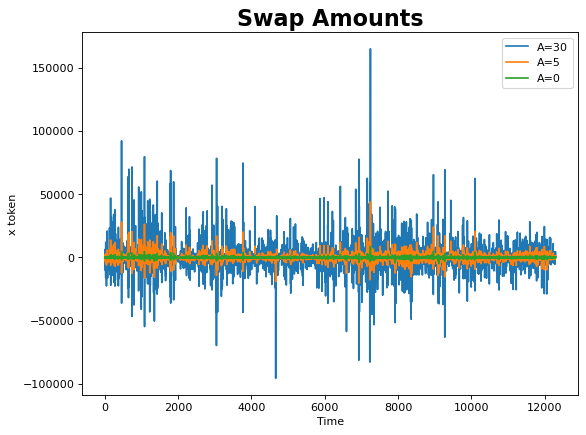

In [55]:
figure(figsize=(8, 6), dpi=80)
plt.plot(df_dx.iloc[1:,6], label = 'A=30');
plt.plot(df_dx.iloc[1:,1], label = 'A=5');
plt.plot(data_clean.token0_swap.values, label = 'A=0')
plt.title('Swap Amounts', fontsize=20, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("x token")
plt.legend();

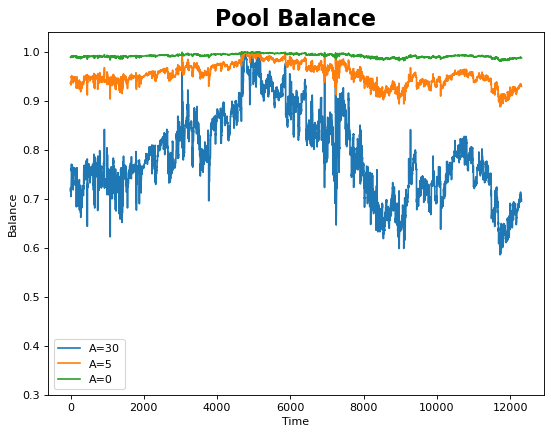

In [56]:
figure(figsize=(8, 6), dpi=80)
plt.plot(df_balance.iloc[:,6], label = 'A=30')
plt.plot(df_balance.iloc[:,1], label = 'A=5')
plt.plot(data_clean.balance.values, label = 'A=0')

plt.title('Pool Balance', fontsize=20, fontweight="bold")
plt.ylim(ymax = 1.04, ymin = 0.3)
#plt.title('Pool Balance')
plt.xlabel("Time")
plt.ylabel("Balance")
plt.legend();